In [6]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
from scipy import signal as sps
import seaborn as sns
import glob
import re

Using matplotlib backend: Qt4Agg


In [7]:
complete=pd.DataFrame([])
date='160620_3'
os.chdir('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\%s'%date)
for filename in glob.glob('*dt.txt'):
    f=pd.read_csv(filename,nrows=175)
    df=f[[col for col in f.columns if 'G PMT' in col]]
    complete=pd.concat([complete,df],axis=1)
#     peak=[]
#     for col in df.columns:
#         a=df[col]
#         firsta=1;
#         firstb=24;
#         #Figures out if there is a min or max and sees if it passes threshold (3SD)
#         if np.absolute(min(a[26:80]))>np.absolute(max(a[26:80])) and np.absolute(min(a[26:80]))>=3*np.std(df[col][firsta:firstb]):
#             b=min(a[26:80])
#             peak.append(b)
#         elif np.absolute(max(a[26:80]))>np.absolute(min(a[26:80]))and np.absolute(max(a[26:80]))>=3*np.std(df[col][firsta:firstb]):
#             b=max(a[26:80])
#             peak.append(b)
#         else:
#             b=0
#             peak.append(b)
#         peaks=pd.DataFrame(peak).T
#     peaks.columns=df.columns
#     peaks=pd.concat([pd.DataFrame({'Trial':[int(filename.split('dt')[0])]}),peaks],axis=1)
#     peakdf=peakdf.append(peaks,ignore_index=True)

# PLOT TRACES

In [26]:
sns.set(palette="muted",color_codes=True);
sns.set_context("poster",font_scale=1.3);
plt.figure(figsize=(8,7))
plt.plot(complete);
sns.despine()
plt.ylabel('DF/F');
plt.title('Traces from one imaging session');
plt.xlabel('Frame');
plt.tight_layout()

# Separate by group

In [25]:
filename='C:\Users\Annie\Documents\Data\Ca_Imaging\GoodFiles\\fullpeak.csv'
comp=pd.read_csv(filename)
comp_sorted=comp.reindex_axis(comp.mean().sort_values().index, axis=1)
comp_labels=pd.DataFrame(comp.Mouse)
comp_group=pd.DataFrame(comp.Group)
tmp=[comp_group,comp_labels,comp_sorted]
composite_full=pd.concat(tmp,axis=1)
cfull=pd.melt(composite_full,['Group','Mouse'],var_name="Odor")
composite_full.head()

,Group,Mouse,MS01,THA,Blank,MS10,AP,MS05,IAA05,PA,IAA01,IAA10,Hexanal10,Hexanone,Hexanal01,Hexanal05,EB
0,Control,160321_1,0.015671,0.067358,NaN,0.150474,0.036738,0.169456,0.034294,0.037389,0.188597,0.099708,0.069948,0.093353,0.062999,0.124211,-0.061840
1,Control,160321_1,-0.034636,0.095266,NaN,0.074001,0.073576,0.139423,0.001814,-0.002271,0.188666,0.041676,0.036447,-0.026087,0.014205,0.101018,0.056893
2,Control,160321_1,-0.044179,0.146676,NaN,0.260675,0.058214,0.095906,0.127803,0.221412,0.477065,0.287615,0.263380,0.022945,0.129928,0.293199,0.153817
3,Control,160321_1,0.146939,0.094015,NaN,0.071141,0.110235,0.157300,0.104363,0.051386,0.248613,0.034975,0.037260,-0.057530,0.104142,0.198974,0.082859
4,Control,160321_1,0.268299,0.069755,NaN,0.220858,0.116399,0.233311,0.240154,0.203381,0.393188,0.309290,0.145721,-0.147715,0.315627,0.538062,0.694684


In [39]:
df=composite_full
# df.columns=['Group','Mouse',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

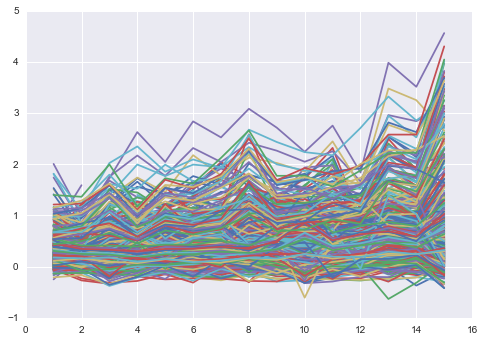

In [40]:
for x in df.index:
    plt.plot(df.iloc[x,2:]);

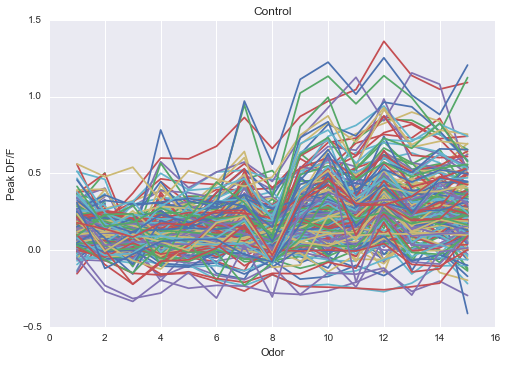

In [50]:
for x in df[df.Group=='Control'].index:
    plt.plot(df.iloc[x,2:]);
    plt.xlabel('Odor')
    plt.ylabel('Peak DF/F')
    plt.title('Control')

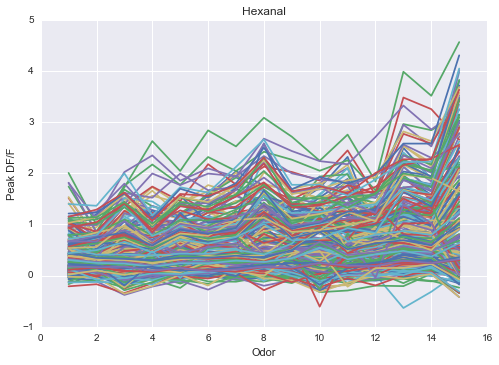

In [52]:
for x in df[df.Group=='Hexanal'].index:
    plt.plot(df.iloc[x,2:]);
    plt.xlabel('Odor')
    plt.ylabel('Peak DF/F')
    plt.title('Hexanal')

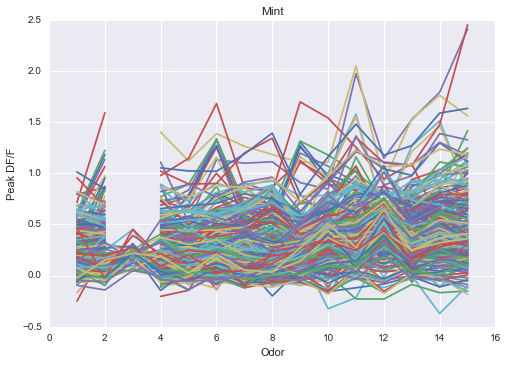

In [53]:
for x in df[df.Group=='Mint'].index:
    plt.plot(df.iloc[x,2:]);
    plt.xlabel('Odor')
    plt.ylabel('Peak DF/F')
    plt.title('Mint')

In [54]:
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])